# Bro Log
For the beginning, we should know some arguments about how to operated Zeek logs, such as add Zeek logs to a data frame, and export Zeek logs from Vast to any flexible framework.

## Converts a Zeek log to a Pandas DataFrame
[bat/log_dataframe.py at master · SuperCowPowers/bat](https://github.com/SuperCowPowers/bat/blob/master/bat/log_to_dataframe.py)

In [13]:
# Local imports
import bat
from bat import log_to_dataframe
from bat import dataframe_to_matrix

In [19]:

# Create a Pandas dataframe from a Bro log
bro_df = log_to_dataframe.LogToDataFrame('../../logs/current/http.log')

# Print out the head of the dataframe
bro_df.head()

Successfully monitoring ../../logs/current/http.log...


,body_data,body_length,host,id.orig_h,id.orig_p,id.resp_h,id.resp_p,info_code,info_msg,method,...,response_body_len,status_code,status_msg,tags,trans_depth,uid,uri,user_agent,username,version
ts,,,,,,,,,,,,,,,,,,,,,
2019-02-15 13:31:55.230982,(empty),0,-,2600:1700:e0d0:5368:20c:29ff:fe2d:d81e,44734,2600:3402:200:227::2,80,0,-,-,...,217850,200,OK,(empty),1,CRKQzh2t1KBXPnzyZ1,-,-,-,1.1
2019-02-15 13:34:13.836364,(empty),0,inglotcosmetics.com,192.168.122.149,49299,212.85.116.154,80,0,-,GET,...,12563,200,OK,(empty),1,Ck0zR73uoYZMuRfi,/,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,-,1.1
2019-02-15 13:34:13.836364,(empty),0,inglotcosmetics.com,192.168.122.149,49299,212.85.116.154,80,0,-,GET,...,510,200,OK,(empty),2,Ck0zR73uoYZMuRfi,/style/jquery.checkbox.css,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,-,1.1
2019-02-15 13:34:13.836364,(empty),0,inglotcosmetics.com,192.168.122.149,49299,212.85.116.154,80,0,-,GET,...,14053,200,OK,(empty),3,Ck0zR73uoYZMuRfi,/client/global.js,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,-,1.1
2019-02-15 13:34:13.836364,(empty),0,st.domandvilma.com,192.168.122.149,49308,192.185.21.183,80,0,-,GET,...,954,200,OK,(empty),1,CovIzB4U9Dw1H4lUPb,/ysviewforumoowpl.php,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,-,1.1


In [82]:

# Show the dataframe with mixed feature types
features = ['id.resp_p', 'method', 'resp_mime_types', 'request_body_len']
bro_df[features].head()

,id.resp_p,method,resp_mime_types,request_body_len
ts,,,,
2019-02-15 13:31:55.230982,80,-,application/x-debian-package,0
2019-02-15 13:34:13.836364,80,GET,text/html,0
2019-02-15 13:34:13.836364,80,GET,text/plain,0
2019-02-15 13:34:13.836364,80,GET,text/plain,0
2019-02-15 13:34:13.836364,80,GET,text/plain,0


In [ ]:
## Converts Zeek logs to CVS

In [91]:
#fields ts      uid     id.orig_h       id.orig_p       id.resp_h       id.resp_p       trans_depth     method  host
#    uri     referrer        version user_agent      request_body_len        response_body_len       status_code     status_msg      info_code       info_msg        tags    username        password        proxied orig_fuids      orig_filenames  orig_mime_types resp_fuids      resp_filenames  resp_mime_types body_length     body_data       params_data
import pandas as pda
http_df = pd.read_csv("../../logs/current/http.log", header=None, sep="\t", names=['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'trans_depth', 'method', 'host', 'uri', 'referrer', 'user_agent', 'request_body_len', 'response_body_len', 'status_code', 'status_msg', 'info_code', 'info_msg', 'filename', 'tags', 'username', 'password', 'proxied', 'orig_fuids', 'orig_mime_types', 'resp_fuids', 'resp_mime_types', 'sample'])

In [92]:
# how to show data manipulate it by calling the describe() method
http_df.describe()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
count,5572,5566,5566,5566,5566,5566,5566,5566,5566,5566,...,5566,5566,5566,5566,5566,5566,5566,5566,5566,5566
unique,5551,3091,21,539,389,11,102,6,386,1744,...,3,3,3,3,3,166,3,4,4468,29
top,1550266473.608821,CIW5pg1Gwr4rISKxgi,10.10.100.139,49258,199.212.255.139,80,1,GET,xml2.danarimedia.com,-,...,-,(empty),-,-,-,-,-,-,-,-
freq,11,100,1058,306,304,5483,3089,5086,303,187,...,5564,5564,5564,5564,5564,5401,5564,5446,1099,5401


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1296ca978>,
      dtype=object)

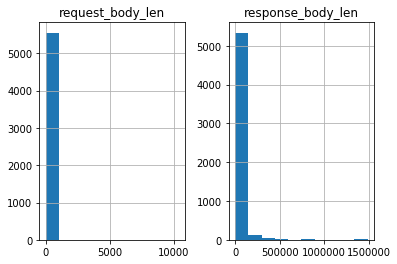

In [30]:
# to view each number of host
bro_df[['request_body_len','response_body_len']].hist()


In [8]:
# Filtering Data Using Conditions and Clean_up a specific field

In [32]:
from datetime import datetime
http_df[['ts']]
# delete in the first seven rows
http_df['ts'] = [datetime.fromtimestamp(float(date)) for date in http_df['ts'].values

In [34]:
http_df = http_df.set_index('ts')
http_df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
ts,,,,,,,,,,,,,,,,,,,,,
#separator \x09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#set_separator,",",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#empty_field,(empty),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#unset_field,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#path,http,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'HTTP Requests per Second')

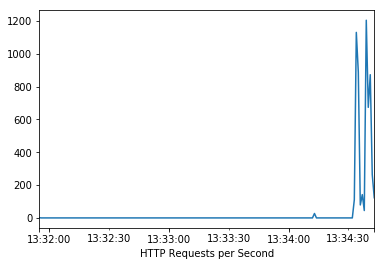

In [38]:
import matplotlib.pyplot as plt
bro_df['uid'].resample('1S').count().plot()
plt.xlabel('HTTP Requests per Second')

In [43]:
bro_df['body_length'].max()

1460

In [44]:
bro_df['body_length'].min()

0

In [45]:
bro_df['body_length'].std()

83.0194061098829

In [61]:
bro_df[bro_df['request_body_len'] > 1000]['body_length'].mean()

1316.75

In [66]:
# finding out specific host name of the related repospinse_body_len
bro_df[bro_df['host'] == 'inglotcosmetics.com']['response_body_len'].mean()

9042.0

In [ ]:
#Plotting the Relationship Between body_length and response_body_len

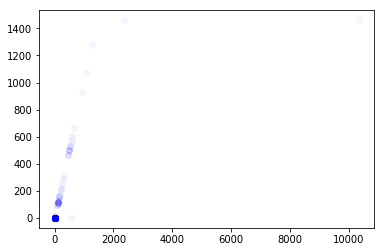

In [68]:
# 'bo' mean, tells matplotilb what color can be used
# 'alpha' is transparency of the circles, to 0.1
from matplotlib import pyplot 
pyplot.plot(bro_df['request_body_len'],bro_df['body_length'],'bo',alpha=0.01)

In [69]:
# load 'dateutil' support to easily parse dates from many different formats.
import dateutil

In [95]:
import seaborn

In [ ]:
seaborn.countplot(x='host', data=bro_df)
pyplot.show()